# Imports, acquire data and data prep:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import (classification_report,
 confusion_matrix, accuracy_score, precision_score, recall_score)
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

import acquire, prepare

In [2]:
#Get titanic data set
titanic = acquire.get_titanic_data()

In [3]:
#Prepare titanic data for processing
titanic = prepare.prep_titanic(titanic)

In [4]:
#Split the data into train, validate and test sets
train, val, test = prepare.train_validate(titanic, 'survived')

In [5]:
#Seperate the target columns in each set for input into the algorithm
X_train = train.drop(columns='survived')
y_train = train.survived

X_val = val.drop(columns='survived')
y_val = val.survived

X_test = test.drop(columns='survived')
y_test = test.survived

In [6]:
#Shows that deceased is our baseline:
train.survived.value_counts()

0    192
1    119
Name: survived, dtype: int64

# KNN Exercises:

1. Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [7]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [8]:
knn.score(X_train, y_train)

0.8295819935691319

2. Evaluate your results using the model score, confusion matrix, and classification report.

In [9]:
knn.score(X_val,y_val)

0.6698717948717948

In [10]:
y_pred = knn.predict(X_train)

In [11]:
class_report = pd.DataFrame(classification_report(y_train, y_pred, output_dict=True, target_names = ['deceased', 'survived']))

In [12]:
pd.DataFrame(confusion_matrix(y_train, y_pred))

,0,1
0,164,28
1,25,94


In [13]:
tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
tn, fp, fn, tp

(164, 28, 25, 94)

3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [14]:
class_report

,deceased,survived,accuracy,macro avg,weighted avg
precision,0.867725,0.770492,0.829582,0.819108,0.830520
recall,0.854167,0.789916,0.829582,0.822041,0.829582
f1-score,0.860892,0.780083,0.829582,0.820488,0.829972
support,192.000000,119.000000,0.829582,311.000000,311.000000


In [15]:
#What do they mean "rate"?
tp_rate = tp/(tp+fn)
fp_rate = fp/(fp+tn)
tn_rate = tn/(fp+tn)
fn_rate = fn/(tp+fn)
print(f'The true positive rate is:  {tp_rate*100:.2f}%')
print(f'The false positive rate is: {fp_rate*100:.2f}%')
print(f'The true negative rate is:  {tn_rate*100:.2f}%')
print(f'The false negative rate is: {fn_rate*100:.2f}%')


The true positive rate is:  78.99%
The false positive rate is: 14.58%
The true negative rate is:  85.42%
The false negative rate is: 21.01%


4. Run through steps 1-3 setting k to 10

In [16]:
knn2 = KNeighborsClassifier(n_neighbors=10)
knn2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [17]:
knn2.score(X_train, y_train)

0.7652733118971061

In [18]:
y_pred2 = knn2.predict(X_train)

In [19]:
class_report2 = pd.DataFrame(classification_report(y_train, y_pred2, output_dict=True, target_names = ['deceased', 'survived']))
class_report2

,deceased,survived,accuracy,macro avg,weighted avg
precision,0.769231,0.755556,0.765273,0.762393,0.763998
recall,0.885417,0.571429,0.765273,0.728423,0.765273
f1-score,0.823245,0.650718,0.765273,0.736981,0.757229
support,192.000000,119.000000,0.765273,311.000000,311.000000


In [20]:
pd.DataFrame(confusion_matrix(y_train, y_pred2))

,0,1
0,170,22
1,51,68


In [21]:
tn, fp, fn, tp = confusion_matrix(y_train, y_pred2).ravel()
tn, fp, fn, tp

(170, 22, 51, 68)

5. Run through steps 1-3 setting k to 20

In [22]:
knn3 = KNeighborsClassifier(n_neighbors=20)
knn3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [23]:
knn3.score(X_train, y_train)

0.7106109324758842

In [24]:
y_pred3 = knn3.predict(X_train)

In [25]:
class_report3 = pd.DataFrame(classification_report(y_train, y_pred3, output_dict=True, target_names = ['deceased', 'survived']))
class_report3

,deceased,survived,accuracy,macro avg,weighted avg
precision,0.705645,0.730159,0.710611,0.717902,0.715025
recall,0.911458,0.386555,0.710611,0.649006,0.710611
f1-score,0.795455,0.505495,0.710611,0.650475,0.684505
support,192.000000,119.000000,0.710611,311.000000,311.000000


In [26]:
pd.DataFrame(confusion_matrix(y_train, y_pred3))

,0,1
0,175,17
1,73,46


In [27]:
tn, fp, fn, tp = confusion_matrix(y_train, y_pred3).ravel()
tn, fp, fn, tp

(175, 17, 73, 46)

6. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

In [28]:
print("---------------------------------------------------------------------")
print(class_report)
print("---------------------------------------------------------------------")
print(class_report2)
print("---------------------------------------------------------------------")
print(class_report3)
print("---------------------------------------------------------------------")

---------------------------------------------------------------------
             deceased    survived  accuracy   macro avg  weighted avg
precision    0.867725    0.770492  0.829582    0.819108      0.830520
recall       0.854167    0.789916  0.829582    0.822041      0.829582
f1-score     0.860892    0.780083  0.829582    0.820488      0.829972
support    192.000000  119.000000  0.829582  311.000000    311.000000
---------------------------------------------------------------------
             deceased    survived  accuracy   macro avg  weighted avg
precision    0.769231    0.755556  0.765273    0.762393      0.763998
recall       0.885417    0.571429  0.765273    0.728423      0.765273
f1-score     0.823245    0.650718  0.765273    0.736981      0.757229
support    192.000000  119.000000  0.765273  311.000000    311.000000
---------------------------------------------------------------------
             deceased    survived  accuracy   macro avg  weighted avg
precision    0.70564

- Model 1 preformed the best with the training data.

7. Which model performs best on our out-of-sample data from validate?

In [29]:
print("-----------------------------------------------------------------------------")
print(f'Model 1 accuracy with the training set is: {knn.score(X_train, y_train) * 100:.1f}% and validation set is: {knn.score(X_val, y_val)*100:.1f}%')
print("-----------------------------------------------------------------------------")
print(f'Model 2 accuracy with the training set is: {knn2.score(X_train, y_train)*100:.1f}% and validation set is: {knn2.score(X_val, y_val)*100:.1f}%')
print("-----------------------------------------------------------------------------")
print(f'Model 3 accuracy with the training set is: {knn3.score(X_train, y_train)*100:.1f}% and validation set is: {knn3.score(X_val, y_val)*100:.1f}%')
print("-----------------------------------------------------------------------------")

-----------------------------------------------------------------------------
Model 1 accuracy with the training set is: 83.0% and validation set is: 67.0%
-----------------------------------------------------------------------------
Model 2 accuracy with the training set is: 76.5% and validation set is: 65.7%
-----------------------------------------------------------------------------
Model 3 accuracy with the training set is: 71.1% and validation set is: 68.6%
-----------------------------------------------------------------------------


- It appears model 2 performs the best or has the lowest difference between the training and validation sets.

In [30]:
metrics = []

for i in range(1, 51, 2): #Remember not to use even numbers to prevent gridlock.
    knn_5 = KNeighborsClassifier(n_neighbors=i)
    knn_5 = knn_5.fit(X_train, y_train)
    in_sample_accuracy = knn_5.score(X_train, y_train)
    out_of_sample_accuracy = knn_5.score(X_val, y_val)

    output = {"max_depth" : i, "train_accuracy": in_sample_accuracy, "validate_accuracy": out_of_sample_accuracy}
              
    metrics.append(output)

df = pd.DataFrame(metrics)              
df['difference'] = df.train_accuracy - df.validate_accuracy              
#df              


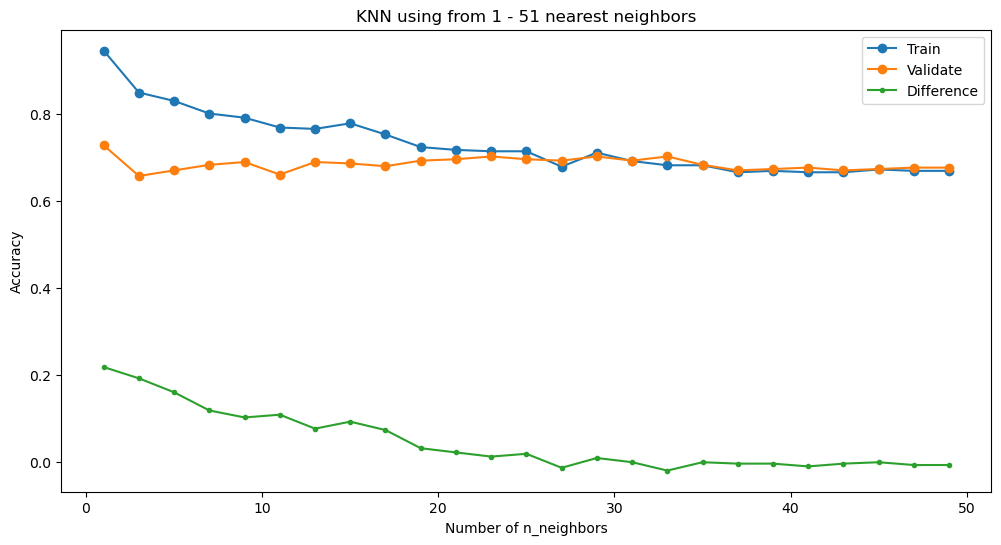

In [31]:

plt.figure(figsize=(12,6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o', label= 'Train')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o', label= 'Validate')
plt.plot(df.max_depth, df.difference, marker = '.', label = 'Difference')
plt.legend()
plt.title("KNN using from 1 - 51 nearest neighbors")
plt.xlabel("Number of n_neighbors")
plt.ylabel("Accuracy")
plt.show()


In [32]:
metrics1 = []

for i in range(1, 51, 2): #Remember not to use even numbers to prevent gridlock.
    knn_5 = KNeighborsClassifier(n_neighbors=i, leaf_size=51-i)
    knn_5 = knn_5.fit(X_train, y_train)
    in_sample_accuracy = knn_5.score(X_train, y_train)
    out_of_sample_accuracy = knn_5.score(X_val, y_val)

    output = {"max_depth" : i, "train_accuracy": in_sample_accuracy, "validate_accuracy": out_of_sample_accuracy}
              
    metrics1.append(output)

df1 = pd.DataFrame(metrics1)              
df1['difference'] = df1.train_accuracy - df1.validate_accuracy              
#df              


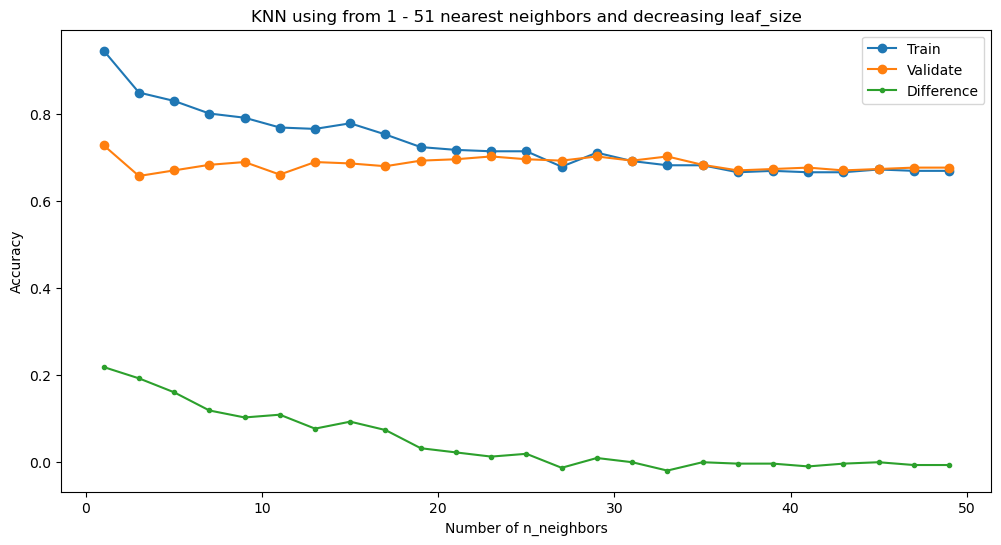

In [33]:

plt.figure(figsize=(12,6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o', label= 'Train')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o', label= 'Validate')
plt.plot(df.max_depth, df.difference, marker = '.', label = 'Difference')
plt.legend()
plt.title("KNN using from 1 - 51 nearest neighbors and decreasing leaf_size")
plt.xlabel("Number of n_neighbors")
plt.ylabel("Accuracy")
plt.show()


In [34]:
metrics2 = []

for i in range(1, 51, 2): #Remember not to use even numbers to prevent gridlock.
    knn_5 = KNeighborsClassifier(n_neighbors=i, leaf_size=i)
    knn_5 = knn_5.fit(X_train, y_train)
    in_sample_accuracy = knn_5.score(X_train, y_train)
    out_of_sample_accuracy = knn_5.score(X_val, y_val)

    output = {"max_depth" : i, "train_accuracy": in_sample_accuracy, "validate_accuracy": out_of_sample_accuracy}
              
    metrics2.append(output)

df2 = pd.DataFrame(metrics2)              
df2['difference'] = df2.train_accuracy - df2.validate_accuracy              
#df              


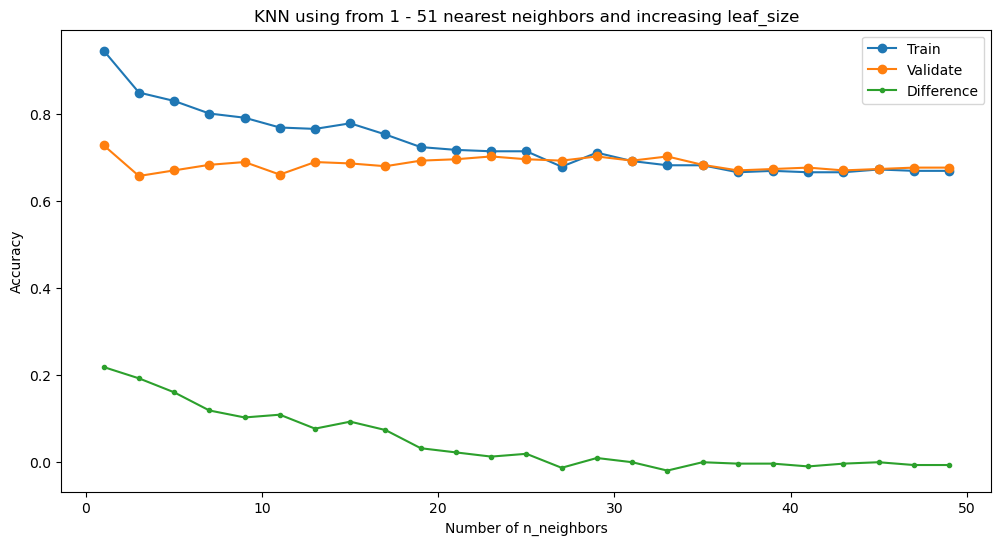

In [35]:

plt.figure(figsize=(12,6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o', label= 'Train')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o', label= 'Validate')
plt.plot(df.max_depth, df.difference, marker = '.', label = 'Difference')
plt.legend()
plt.title("KNN using from 1 - 51 nearest neighbors and increasing leaf_size")
plt.xlabel("Number of n_neighbors")
plt.ylabel("Accuracy")
plt.show()
